<a href="https://colab.research.google.com/github/IshwarKapoor/IshwarKapoor/blob/main/Multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [6]:
df=pd.read_csv('Chapter5_Geologic_DataSet.csv')

In [4]:
df.head()

,Porosity (%),Matrix Perm (nd),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,TOC (%),Vitrinite Reflectance (%),Aroot(K)
0,8.456,292,3.080,97.680,4.64,1.848,48.306469
1,8.666,353,3.542,55.404,3.56,1.504,41.300912
2,9.814,259,4.411,87.360,3.56,2.176,49.688356
3,12.369,675,2.893,47.772,4.32,1.504,59.132694
4,12.264,457,3.498,13.128,6.04,1.520,39.503121


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Porosity (%),200.0,10.493805,2.079824,4.585000,9.03875,10.549000,12.181750,16.485000
Matrix Perm (nd),200.0,433.075000,173.101415,113.000000,312.25000,403.500000,528.750000,987.000000
Acoustic impedance (kg/m2s*10^6),200.0,3.265735,0.623574,1.408000,2.80225,3.250500,3.679500,5.093000
Brittleness Ratio,200.0,57.794340,16.955346,13.128000,45.30600,59.412000,69.915000,101.196000
TOC (%),200.0,3.970700,1.907119,0.100000,2.47000,4.120000,5.400000,8.720000
Vitrinite Reflectance (%),200.0,1.571440,0.240662,0.744000,1.41600,1.568000,1.714000,2.296000
Aroot(K),200.0,50.000000,11.505310,24.437856,41.96103,49.692285,58.986667,77.270733


In [8]:
df.columns

Index(['Porosity (%)', 'Matrix Perm (nd)', 'Acoustic impedance (kg/m2s*10^6)',
       'Brittleness Ratio', 'TOC (%)', 'Vitrinite Reflectance (%)',
       'Aroot(K)'],
      dtype='object')

<ipython-input-9-044781eca9cd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Porosity (%)'] , color="red", ax=axes[0, 0])
<ipython-input-9-044781eca9cd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Matrix Perm (nd)'] , color="olive", ax=axes[0, 1])
<ipython-input-9-044781eca9cd>:4

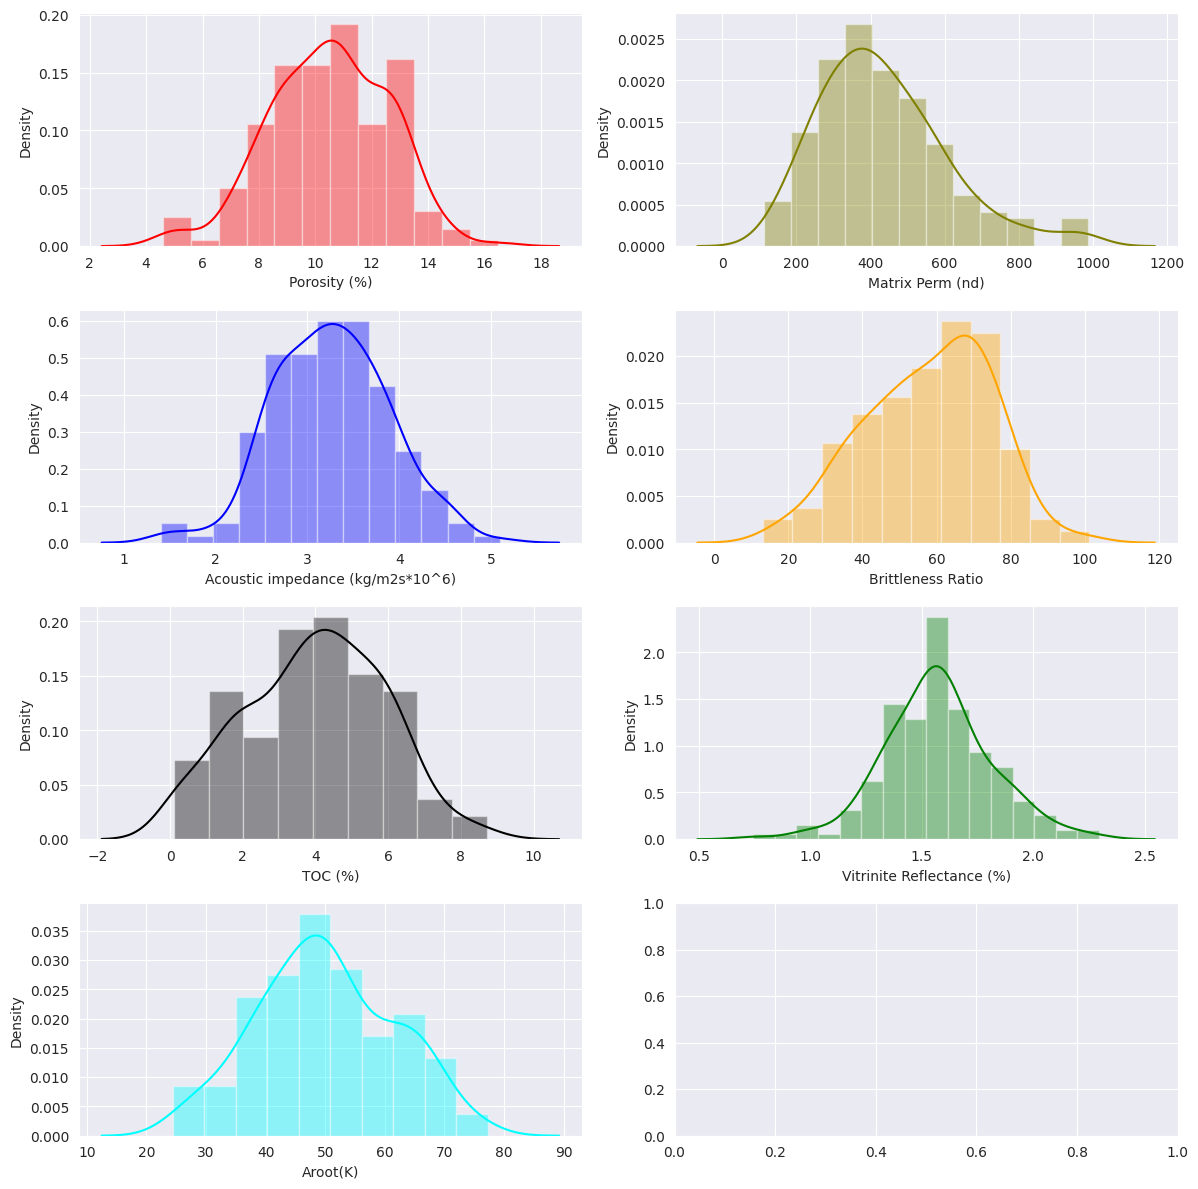

In [9]:
f, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.distplot(df['Porosity (%)'] , color="red", ax=axes[0, 0])
sns.distplot(df['Matrix Perm (nd)'] , color="olive", ax=axes[0, 1])
sns.distplot(df['Acoustic impedance (kg/m2s*10^6)'] , color="blue", ax=axes[1, 0])
sns.distplot(df['Brittleness Ratio'] , color="orange", ax=axes[1, 1])
sns.distplot(df['TOC (%)'] , color="black", ax=axes[2, 0])
sns.distplot(df['Vitrinite Reflectance (%)'] , color="green", ax=axes[2, 1])
sns.distplot(df['Aroot(K)'] , color="cyan", ax=axes[3, 0])

plt.tight_layout()

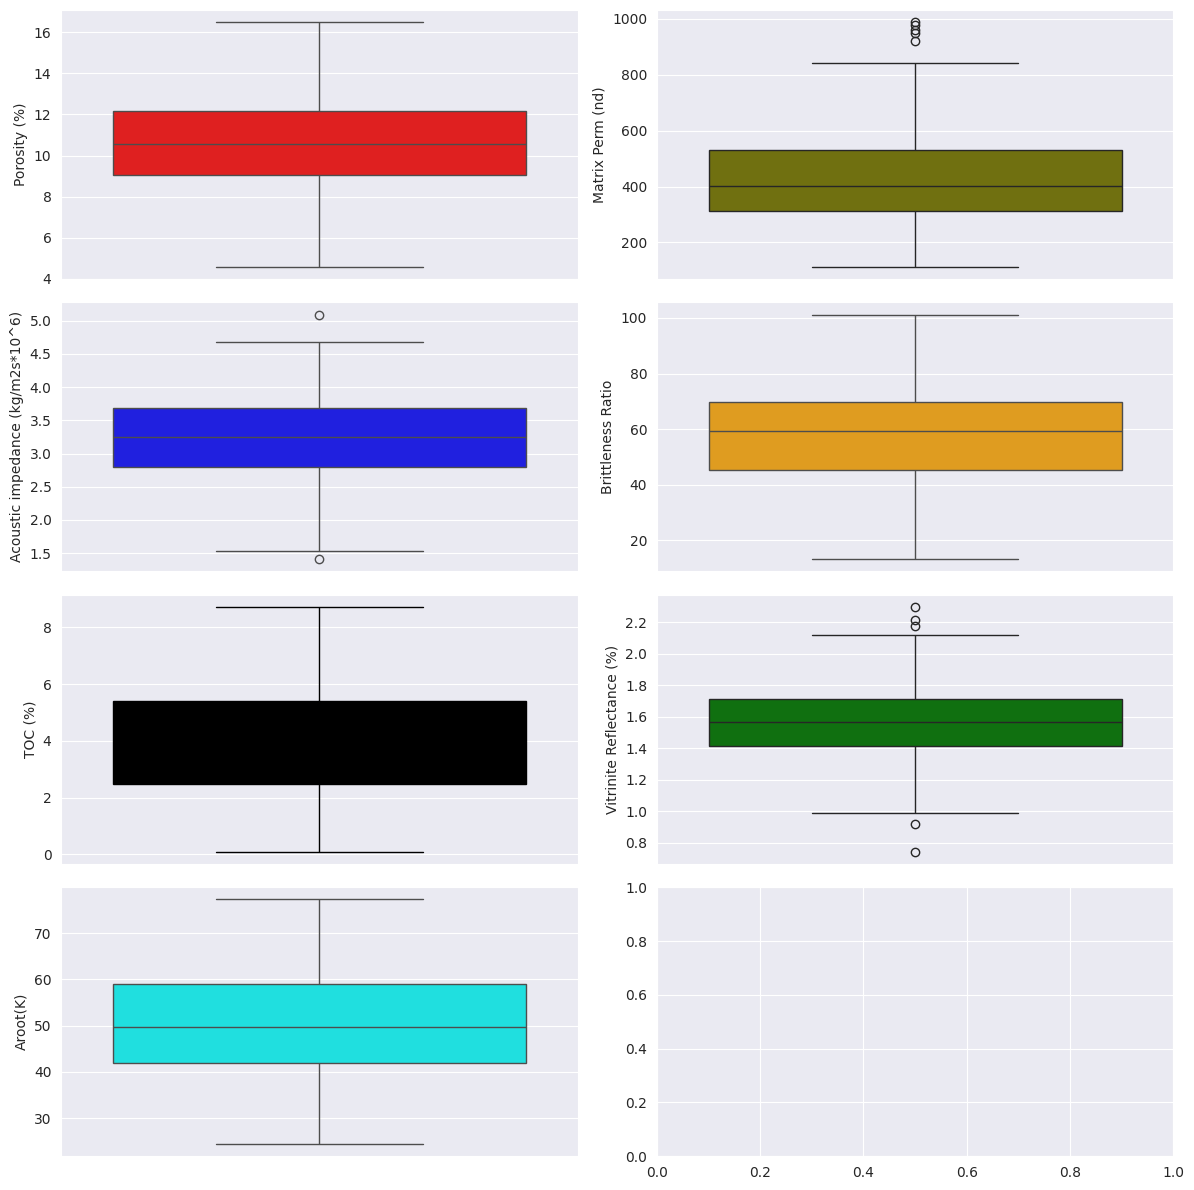

In [10]:
f, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.boxplot(df['Porosity (%)'] , color="red", ax=axes[0, 0])
sns.boxplot(df['Matrix Perm (nd)'] , color="olive", ax=axes[0, 1])
sns.boxplot(df['Acoustic impedance (kg/m2s*10^6)'] , color="blue", ax=axes[1, 0])
sns.boxplot(df['Brittleness Ratio'] , color="orange", ax=axes[1, 1])
sns.boxplot(df['TOC (%)'] , color="black", ax=axes[2, 0])
sns.boxplot(df['Vitrinite Reflectance (%)'] , color="green", ax=axes[2, 1])
sns.boxplot(df['Aroot(K)'] , color="cyan", ax=axes[3, 0])

plt.tight_layout()

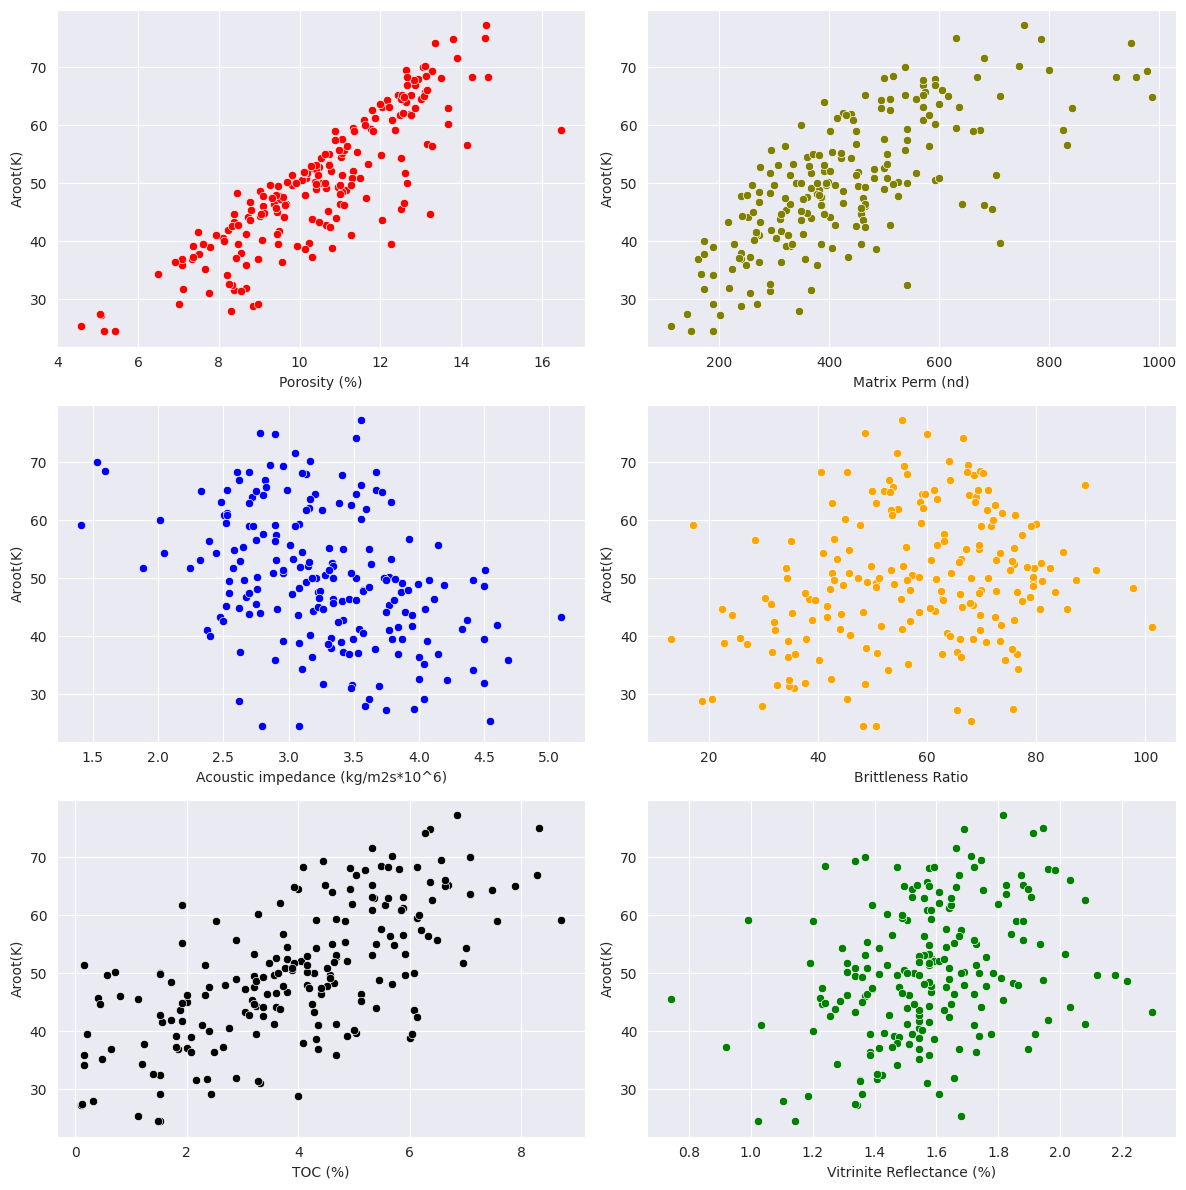

In [14]:
f, axes = plt.subplots(3, 2, figsize=(12, 12))
sns.scatterplot(x=df['Porosity (%)'] ,y=df['Aroot(K)'], color="red", ax=axes[0, 0])
sns.scatterplot(x=df['Porosity (%)'] ,y=df['Aroot(K)'], color="red", ax=axes[0, 0])
sns.scatterplot(x=df['Matrix Perm (nd)'] ,y=df['Aroot(K)'], color="olive", ax=axes[0, 1])
sns.scatterplot(x=df['Acoustic impedance (kg/m2s*10^6)'] , y=df['Aroot(K)'],color="blue", ax=axes[1, 0])
sns.scatterplot(x=df['Brittleness Ratio'] , y=df['Aroot(K)'],color="orange", ax=axes[1, 1])
sns.scatterplot(x=df['TOC (%)'] , y=df['Aroot(K)'],color="black", ax=axes[2, 0])
sns.scatterplot(x=df['Vitrinite Reflectance (%)'] ,y=df['Aroot(K)'], color="green", ax=axes[2, 1])

plt.tight_layout()

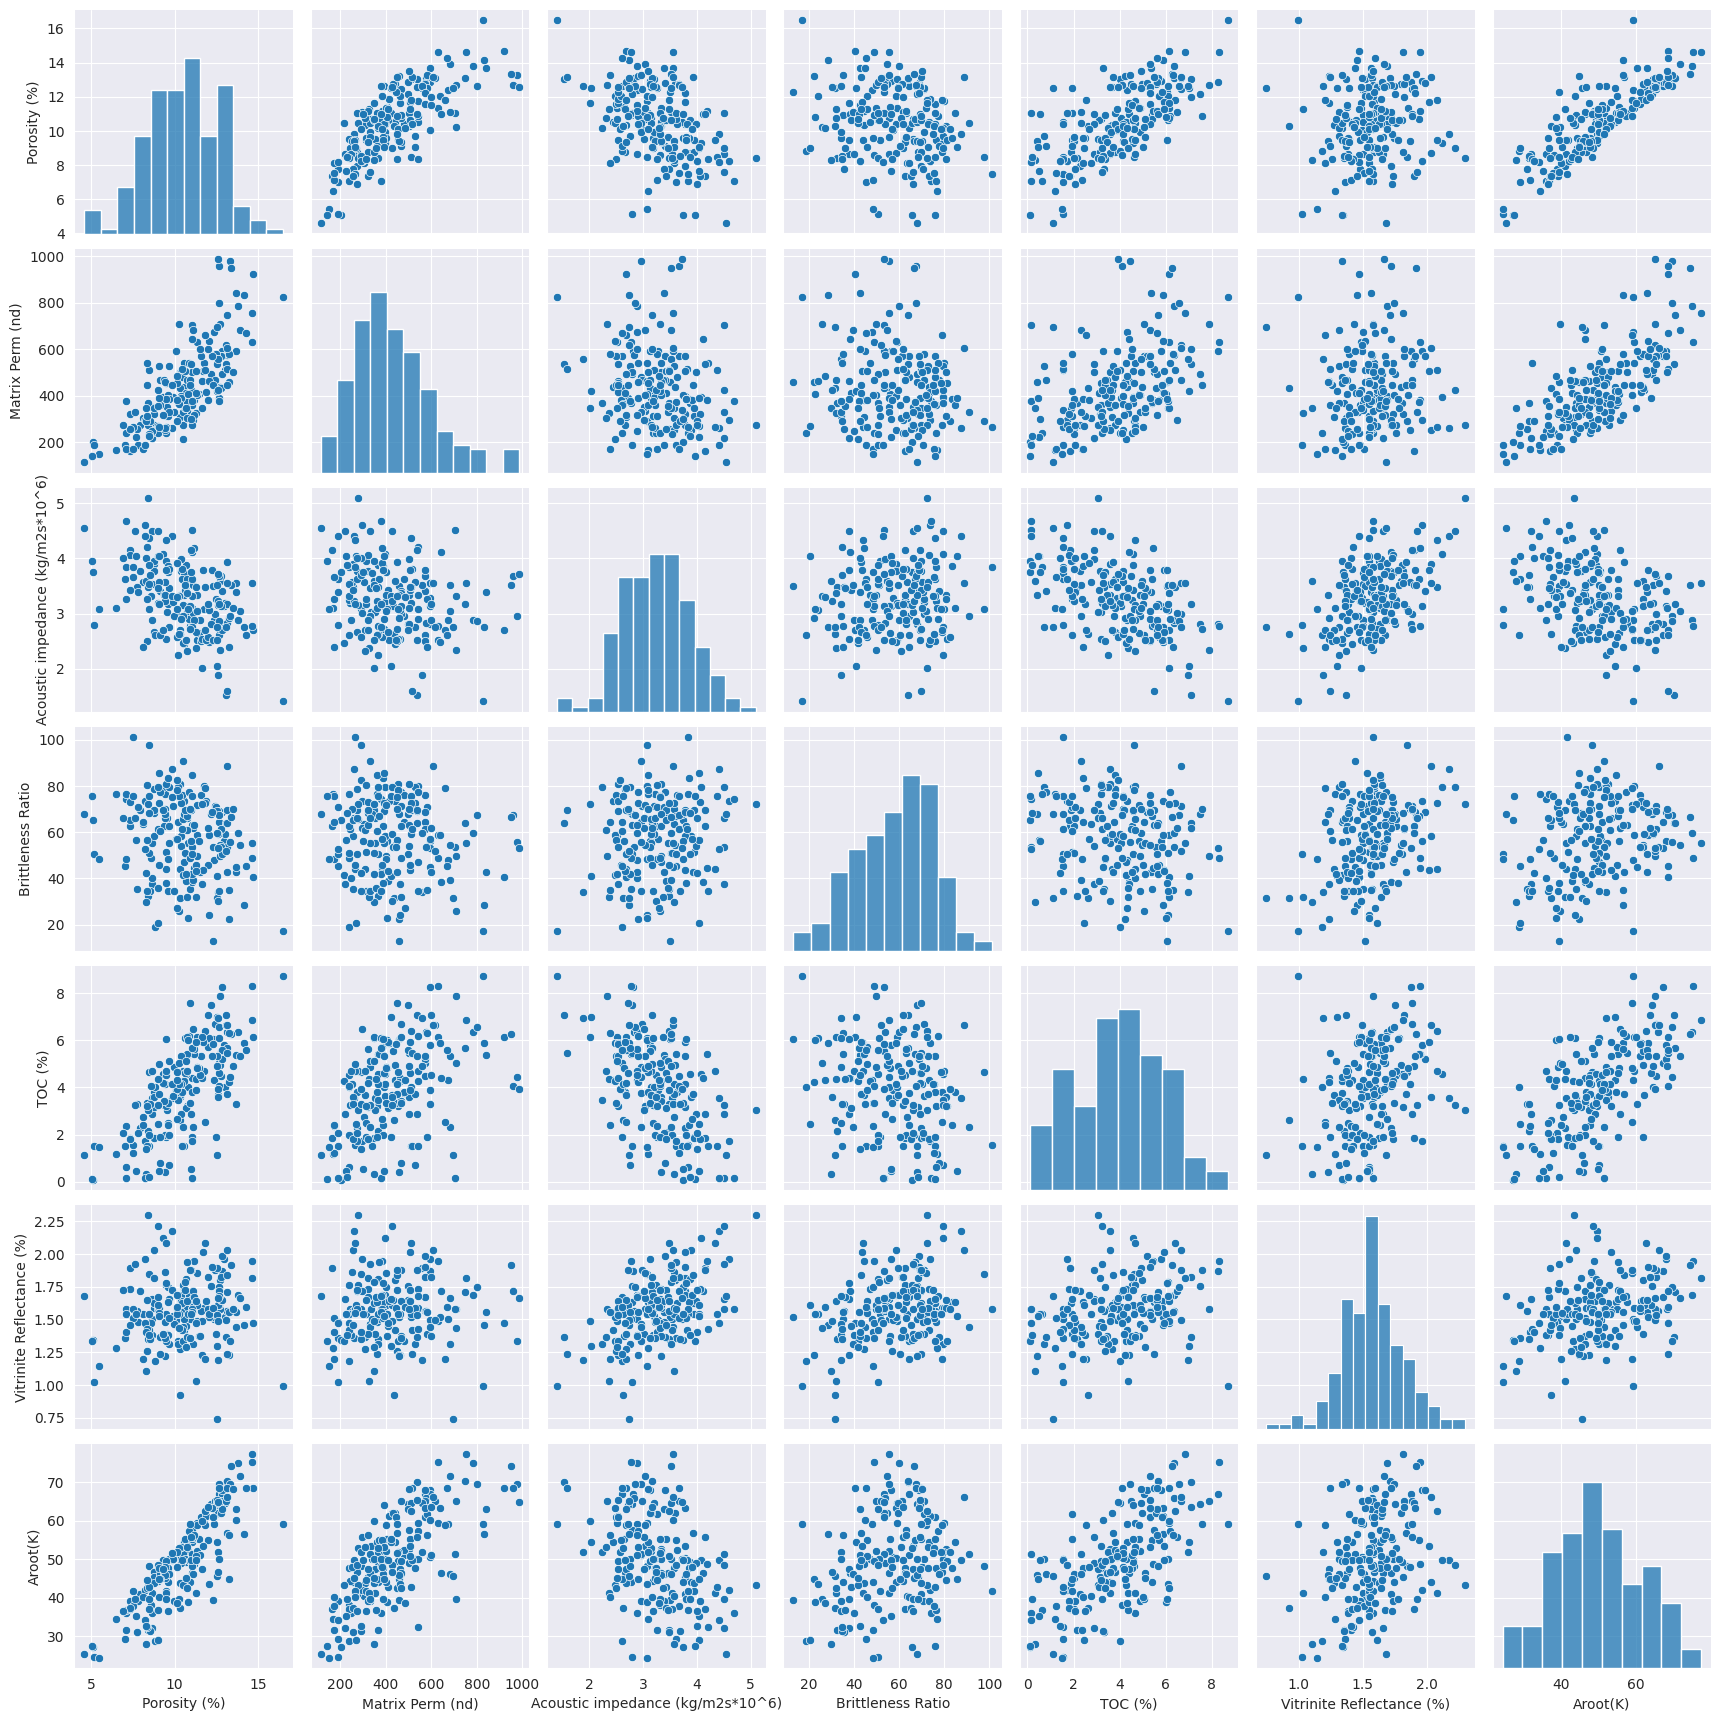

In [15]:
sns.pairplot(df)

<Axes: >

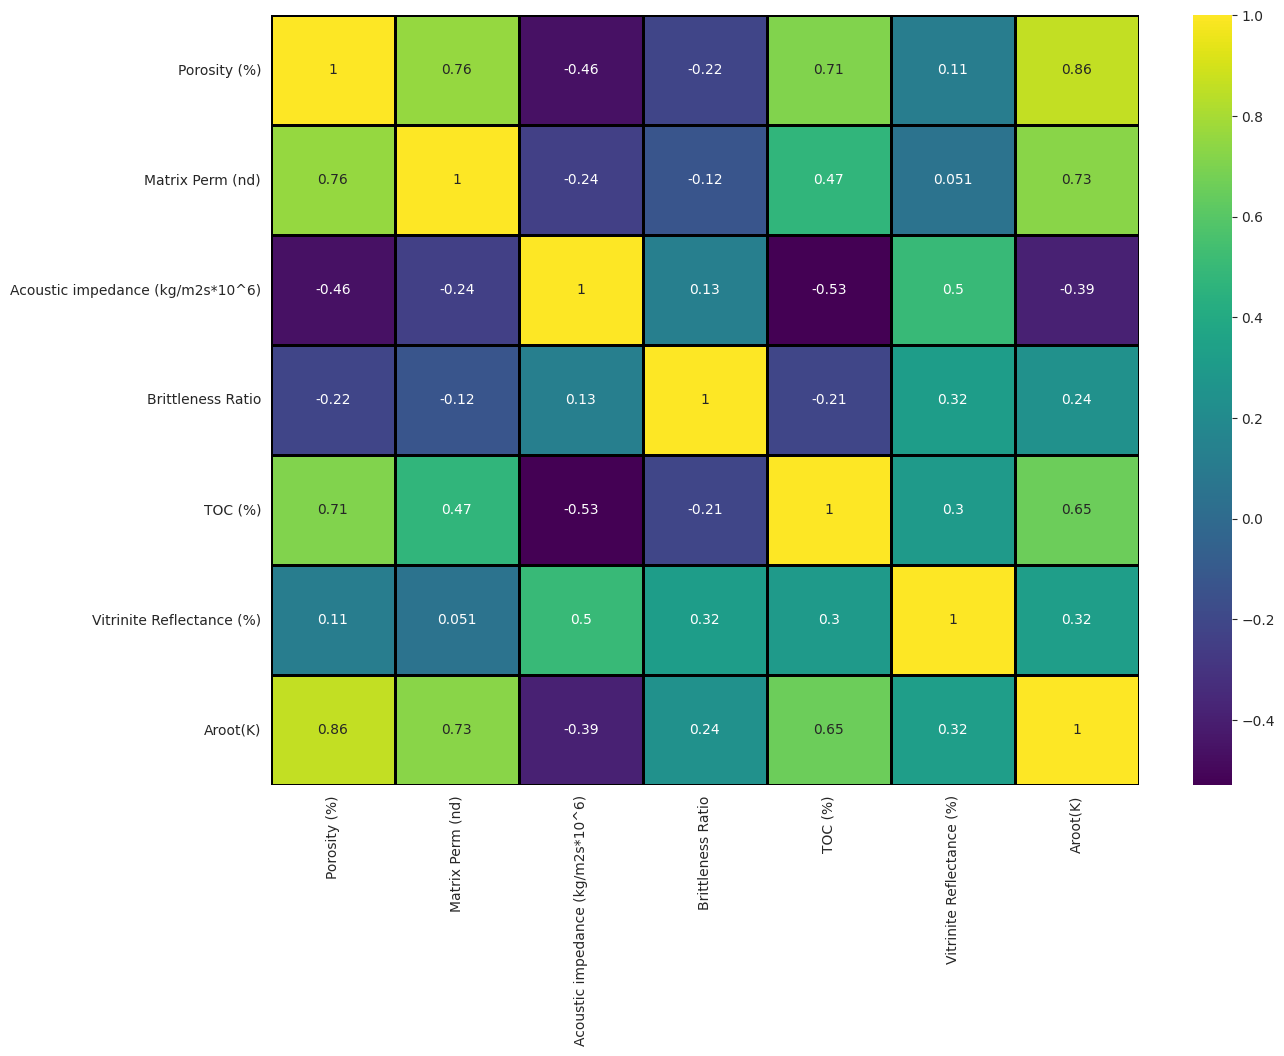

In [16]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),linewidths=2, linecolor='black',cmap='viridis', annot=True)

In [17]:
df.drop(['TOC (%)', 'Matrix Perm (nd)'], axis=1, inplace=True)

In [ ]:
df

,Porosity (%),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,Vitrinite Reflectance (%),Aroot(K)
0,8.456,3.080,97.680,1.848,48.306469
1,8.666,3.542,55.404,1.504,41.300912
2,9.814,4.411,87.360,2.176,49.688356
3,12.369,2.893,47.772,1.504,59.132694
4,12.264,3.498,13.128,1.520,39.503121
...,...,...,...,...,...
195,8.365,3.267,80.616,1.648,44.622765
196,12.593,3.718,53.184,1.664,64.961047
197,8.484,3.872,68.484,1.384,39.543047
198,10.885,2.728,69.900,1.880,59.004091


<Axes: >

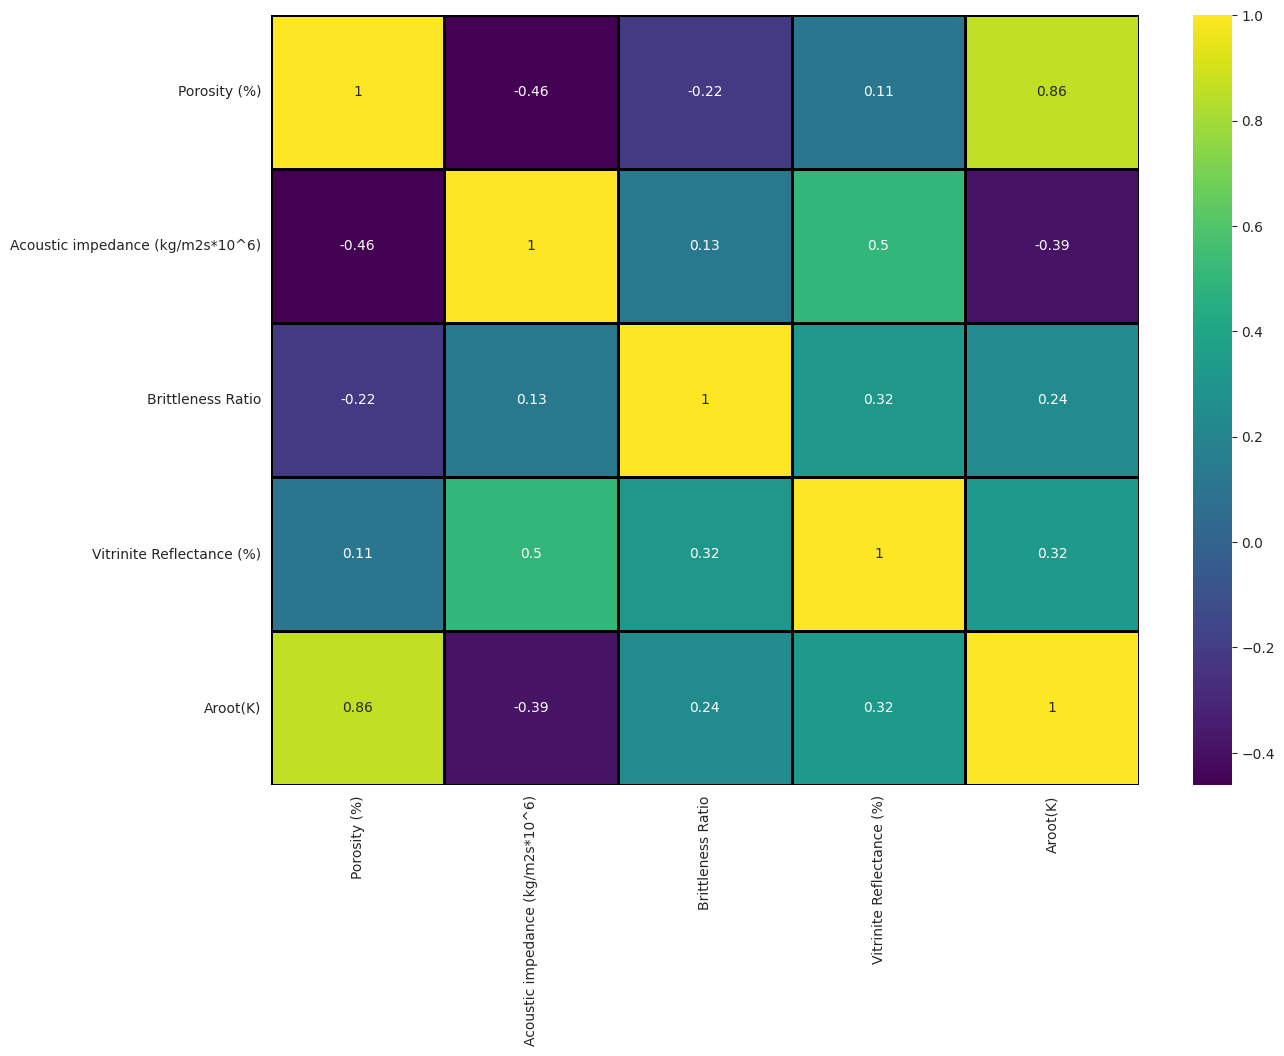

In [20]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),linewidths=2, linecolor='black',cmap='viridis', annot=True)

In [22]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
scaler.fit(df)
df_scaled=scaler.transform(df)
df_scaled

array([[0.32529412, 0.45373134, 0.9600763 , 0.71134021, 0.45177576],
       [0.34294118, 0.57910448, 0.48003815, 0.48969072, 0.31917731],
       [0.43941176, 0.81492537, 0.84289413, 0.92268041, 0.47793158],
       [0.65411765, 0.40298507, 0.39337784, 0.48969072, 0.65669029],
       [0.64529412, 0.56716418, 0.        , 0.5       , 0.28514944],
       [0.46941176, 0.42089552, 0.5812781 , 0.3814433 , 0.50238885],
       [0.40823529, 0.49253731, 0.71903529, 0.4742268 , 0.43843026],
       [0.29588235, 0.5880597 , 0.5731026 , 0.51546392, 0.30503973],
       [0.35117647, 0.34328358, 0.74710451, 0.54123711, 0.42118734],
       [0.39411765, 0.72537313, 0.75296362, 0.88659794, 0.47808031],
       [0.49941176, 0.28059701, 0.68360812, 0.43298969, 0.56731787],
       [0.56705882, 0.30149254, 0.51996185, 0.47938144, 0.66317086],
       [0.60411765, 0.45373134, 0.75909524, 0.54123711, 0.66004008],
       [0.63764706, 0.37910448, 0.61983922, 0.64948454, 0.75497868],
       [0.42823529, 0.36716418, 0.

In [23]:
df.columns

Index(['Porosity (%)', 'Acoustic impedance (kg/m2s*10^6)', 'Brittleness Ratio',
       'Vitrinite Reflectance (%)', 'Aroot(K)'],
      dtype='object')

In [25]:
df_scaled=pd.DataFrame(df_scaled, columns=['Porosity (%)', 'Acoustic impedance (kg/m2s*10^6)',
       'Brittleness Ratio', 'Vitrinite Reflectance (%)', 'Aroot(K)'])

df_scaled

,Porosity (%),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,Vitrinite Reflectance (%),Aroot(K)
0,0.325294,0.453731,0.960076,0.711340,0.451776
1,0.342941,0.579104,0.480038,0.489691,0.319177
2,0.439412,0.814925,0.842894,0.922680,0.477932
3,0.654118,0.402985,0.393378,0.489691,0.656690
4,0.645294,0.567164,0.000000,0.500000,0.285149
...,...,...,...,...,...
195,0.317647,0.504478,0.766317,0.582474,0.382052
196,0.672941,0.626866,0.454830,0.592784,0.767007
197,0.327647,0.668657,0.628560,0.412371,0.285905
198,0.529412,0.358209,0.644638,0.731959,0.654256


In [26]:
y_scaled=df_scaled['Aroot(K)']
x_scaled=df_scaled.drop(['Aroot(K)'], axis=1)

x_scaled

,Porosity (%),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,Vitrinite Reflectance (%)
0,0.325294,0.453731,0.960076,0.711340
1,0.342941,0.579104,0.480038,0.489691
2,0.439412,0.814925,0.842894,0.922680
3,0.654118,0.402985,0.393378,0.489691
4,0.645294,0.567164,0.000000,0.500000
...,...,...,...,...
195,0.317647,0.504478,0.766317,0.582474
196,0.672941,0.626866,0.454830,0.592784
197,0.327647,0.668657,0.628560,0.412371
198,0.529412,0.358209,0.644638,0.731959


In [27]:
y_scaled

0      0.451776
1      0.319177
2      0.477932
3      0.656690
4      0.285149
         ...   
195    0.382052
196    0.767007
197    0.285905
198    0.654256
199    1.000000
Name: Aroot(K), Length: 200, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split

In [38]:
seed= 1000
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.3)

In [39]:
X_train

,Porosity (%),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,Vitrinite Reflectance (%)
44,0.695294,0.382090,0.453468,0.726804
101,0.401176,0.525373,0.562611,0.407216
25,0.042353,0.635821,0.594359,0.386598
3,0.654118,0.402985,0.393378,0.489691
68,0.487647,0.641791,0.515874,0.608247
...,...,...,...,...
94,0.541176,0.459701,0.814007,0.572165
192,0.812941,0.325373,0.365445,0.546392
71,0.448235,0.489552,0.658945,0.505155
87,0.490000,0.602985,0.713585,0.567010


In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
np.random.seed(seed)
lm = LinearRegression()

In [42]:
lm.fit(X_train,y_train)

LinearRegression()

In [43]:
print(lm.intercept_)

-0.29565316262910496


In [45]:
coeff_df = pd.DataFrame(lm.coef_,x_scaled.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Porosity (%),1.069765
Acoustic impedance (kg/m2s*10^6),-0.178141
Brittleness Ratio,0.426330
Vitrinite Reflectance (%),0.231669


Text(0.5, 1.0, 'Actual Vs. Predicted Training')

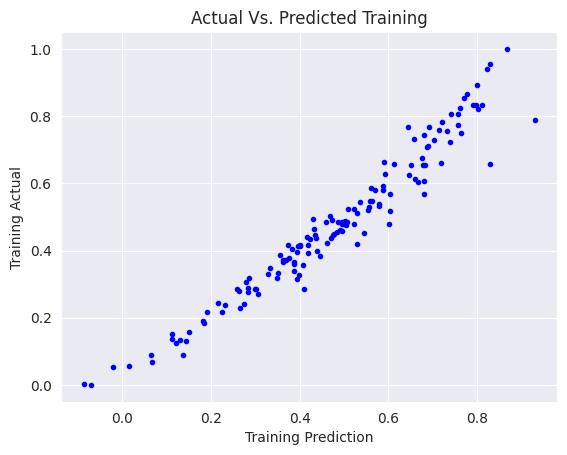

In [46]:
y_prediction=lm.predict(X_train)
plt.plot(y_prediction, y_train, 'b.')
plt.xlabel('Training Prediction')
plt.ylabel('Training Actual')
plt.title('Actual Vs. Predicted Training')

Text(0.5, 1.0, 'Actual Vs. Predicted, Testing Data Set (30% of the data)')

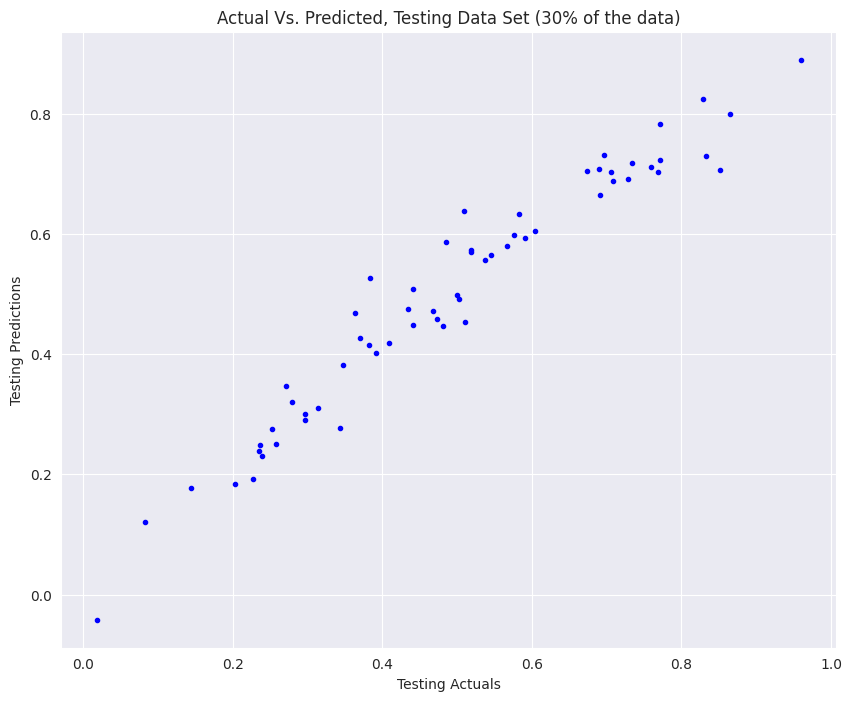

In [47]:
plt.figure(figsize=(10,8))
y_pred = lm.predict(X_test)
plt.plot(y_test,y_pred, 'b.')
plt.xlabel('Testing Actuals')
plt.ylabel('Testing Predictions')
plt.title('Actual Vs. Predicted, Testing Data Set (30% of the data)')

In [52]:
from sklearn.metrics import r2_score
test_set_r2 = r2_score(y_test,y_pred)
print('Testing r^2:',round(test_set_r2,4))

Testing r^2: 0.9416


In [49]:
train_set_r2 = r2_score(y_prediction, y_train)
print('Train r^2:',round(train_set_r2,4))

Train r^2: 0.9427


In [50]:
y_test

118    0.257136
70     0.235644
163    0.296721
161    0.518879
73     0.434727
96     0.696226
16     0.728520
120    0.582683
74     0.705596
143    0.239240
83     0.440350
127    0.591382
62     0.771328
122    0.851234
49     0.709037
157    0.604091
195    0.382052
152    0.768387
10     0.567318
184    0.485620
106    0.391460
37     0.689825
57     0.347865
15     0.314532
66     0.278597
141    0.472588
108    0.959942
172    0.202897
126    0.502201
154    0.270886
182    0.227067
191    0.017701
107    0.576630
98     0.343499
38     0.468094
39     0.518957
28     0.143420
80     0.537376
33     0.441467
165    0.673575
132    0.252691
167    0.236128
24     0.864698
125    0.545197
131    0.691540
171    0.733660
119    0.759742
110    0.509817
136    0.481416
173    0.297061
188    0.500183
22     0.083182
65     0.510323
159    0.832191
17     0.370740
64     0.771226
129    0.363473
178    0.828375
59     0.408830
103    0.384120
Name: Aroot(K), dtype: float64

In [51]:
y_pred

array([ 0.25062133,  0.23853489,  0.28980651,  0.57064808,  0.47501024,
        0.73159979,  0.6911037 ,  0.6337517 ,  0.70293214,  0.23064909,
        0.50797282,  0.59381067,  0.72281046,  0.70591437,  0.68864771,
        0.6055747 ,  0.4159314 ,  0.70330531,  0.580367  ,  0.58636922,
        0.40233511,  0.70813068,  0.38156095,  0.3106789 ,  0.32077805,
        0.45782537,  0.88961586,  0.18337738,  0.49182365,  0.34780657,
        0.19233427, -0.04172157,  0.59758921,  0.27710327,  0.47146136,
        0.57292579,  0.17677735,  0.55638183,  0.44903223,  0.70495631,
        0.27571437,  0.24858081,  0.80005672,  0.56465753,  0.66431418,
        0.71740351,  0.71181345,  0.63822219,  0.4467829 ,  0.30086048,
        0.49896413,  0.12103637,  0.45395915,  0.729584  ,  0.42696677,
        0.78317552,  0.46760066,  0.82497265,  0.41796024,  0.52616439])

<ipython-input-53-2ae69a0d1120>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred))


<Axes: xlabel='Aroot(K)', ylabel='Density'>

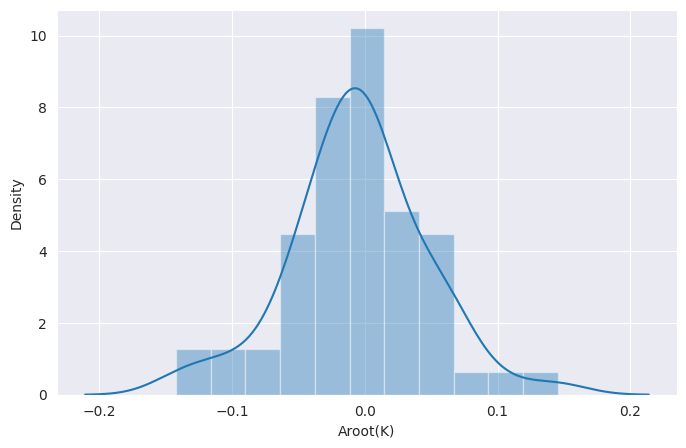

In [53]:
plt.figure(figsize=(8,5))
sns.distplot((y_test-y_pred))

In [54]:
from sklearn import metrics

In [55]:
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred),5))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))

MAE: 0.03793
MSE: 0.00266
RMSE: 0.05159


In [56]:
import statsmodels.api as sm
X = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train,X).fit()
predictions = model.predict(X)

model_stats = model.summary()
print(model_stats)

                            OLS Regression Results                            
Dep. Variable:               Aroot(K)   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     589.0
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           2.26e-84
Time:                        14:00:10   Log-Likelihood:                 218.23
No. Observations:                 140   AIC:                            -426.5
Df Residuals:                     135   BIC:                            -411.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [57]:
df_sensitivity=pd.read_excel('Chapter5_Geologic_Sensitivity_DataSet.xlsx')

In [58]:
df_sensitivity.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Porosity (%),69.0,10.500000,1.635992,4.50,10.5,10.50,10.5,16.50
Acoustic impedance (kg/m2s*10^6),69.0,3.223188,0.787988,1.40,3.1,3.25,3.3,5.00
Brittleness Ratio,69.0,58.855072,11.020403,13.00,59.0,59.00,59.0,103.00
Vitrinite Reflectance (%),69.0,1.505217,0.188357,0.74,1.5,1.50,1.5,2.34
Aroot(K),69.0,50.000000,0.000000,50.00,50.0,50.00,50.0,50.00


In [59]:
scaled_sensitivity=scaler.transform(df_sensitivity)

print(scaled_sensitivity)

[[-0.00714286  0.49986431  0.52087024  0.4871134   0.48383024]
 [ 0.07689076  0.49986431  0.52087024  0.4871134   0.48383024]
 [ 0.16092437  0.49986431  0.52087024  0.4871134   0.48383024]
 [ 0.24495798  0.49986431  0.52087024  0.4871134   0.48383024]
 [ 0.3289916   0.49986431  0.52087024  0.4871134   0.48383024]
 [ 0.41302521  0.49986431  0.52087024  0.4871134   0.48383024]
 [ 0.49705882  0.49986431  0.52087024  0.4871134   0.48383024]
 [ 0.58109244  0.49986431  0.52087024  0.4871134   0.48383024]
 [ 0.66512605  0.49986431  0.52087024  0.4871134   0.48383024]
 [ 0.74915966  0.49986431  0.52087024  0.4871134   0.48383024]
 [ 0.83319328  0.49986431  0.52087024  0.4871134   0.48383024]
 [ 0.91722689  0.49986431  0.52087024  0.4871134   0.48383024]
 [ 1.0012605   0.49986431  0.52087024  0.4871134   0.48383024]
 [ 0.49705882 -0.00217096  0.52087024  0.4871134   0.48383024]
 [ 0.49705882  0.02496608  0.52087024  0.4871134   0.48383024]
 [ 0.49705882  0.05210312  0.52087024  0.4871134   0.48

In [60]:
df_sensitivity.columns

Index(['Porosity (%)', 'Acoustic impedance (kg/m2s*10^6)', 'Brittleness Ratio',
       'Vitrinite Reflectance (%)', 'Aroot(K)'],
      dtype='object')

In [61]:
scaled_sensitivity

array([[-0.00714286,  0.49986431,  0.52087024,  0.4871134 ,  0.48383024],
       [ 0.07689076,  0.49986431,  0.52087024,  0.4871134 ,  0.48383024],
       [ 0.16092437,  0.49986431,  0.52087024,  0.4871134 ,  0.48383024],
       [ 0.24495798,  0.49986431,  0.52087024,  0.4871134 ,  0.48383024],
       [ 0.3289916 ,  0.49986431,  0.52087024,  0.4871134 ,  0.48383024],
       [ 0.41302521,  0.49986431,  0.52087024,  0.4871134 ,  0.48383024],
       [ 0.49705882,  0.49986431,  0.52087024,  0.4871134 ,  0.48383024],
       [ 0.58109244,  0.49986431,  0.52087024,  0.4871134 ,  0.48383024],
       [ 0.66512605,  0.49986431,  0.52087024,  0.4871134 ,  0.48383024],
       [ 0.74915966,  0.49986431,  0.52087024,  0.4871134 ,  0.48383024],
       [ 0.83319328,  0.49986431,  0.52087024,  0.4871134 ,  0.48383024],
       [ 0.91722689,  0.49986431,  0.52087024,  0.4871134 ,  0.48383024],
       [ 1.0012605 ,  0.49986431,  0.52087024,  0.4871134 ,  0.48383024],
       [ 0.49705882, -0.00217096,  0.5

In [62]:
scaled_sensitivity=pd.DataFrame(scaled_sensitivity, columns=['Porosity (%)', 'Acoustic impedance (kg/m2s*10^6)',
       'Brittleness Ratio', 'Vitrinite Reflectance (%)', 'Aroot(K)'])


In [63]:
scaled_sensitivity

,Porosity (%),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,Vitrinite Reflectance (%),Aroot(K)
0,-0.007143,0.499864,0.52087,0.487113,0.48383
1,0.076891,0.499864,0.52087,0.487113,0.48383
2,0.160924,0.499864,0.52087,0.487113,0.48383
3,0.244958,0.499864,0.52087,0.487113,0.48383
4,0.328992,0.499864,0.52087,0.487113,0.48383
...,...,...,...,...,...
64,0.497059,0.499864,0.52087,0.512887,0.48383
65,0.497059,0.499864,0.52087,0.641753,0.48383
66,0.497059,0.499864,0.52087,0.770619,0.48383
67,0.497059,0.499864,0.52087,0.899485,0.48383


In [64]:
y_scaled_sensitivity= scaled_sensitivity['Aroot(K)']
x_scaled_sensitivity= scaled_sensitivity.drop(['Aroot(K)'],axis=1)

x_scaled_sensitivity

,Porosity (%),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,Vitrinite Reflectance (%)
0,-0.007143,0.499864,0.52087,0.487113
1,0.076891,0.499864,0.52087,0.487113
2,0.160924,0.499864,0.52087,0.487113
3,0.244958,0.499864,0.52087,0.487113
4,0.328992,0.499864,0.52087,0.487113
...,...,...,...,...
64,0.497059,0.499864,0.52087,0.512887
65,0.497059,0.499864,0.52087,0.641753
66,0.497059,0.499864,0.52087,0.770619
67,0.497059,0.499864,0.52087,0.899485


In [65]:
y_scaled_sensitivity

0     0.48383
1     0.48383
2     0.48383
3     0.48383
4     0.48383
       ...   
64    0.48383
65    0.48383
66    0.48383
67    0.48383
68    0.48383
Name: Aroot(K), Length: 69, dtype: float64

In [66]:
y_pred_sensitivity=lm.predict(x_scaled_sensitivity)

In [67]:
y_pred_sensitivity

array([-0.05742901,  0.03246721,  0.12236342,  0.21225964,  0.30215585,
        0.39205207,  0.48194828,  0.5718445 ,  0.66174071,  0.75163693,
        0.84153314,  0.93142936,  1.02132557,  0.57138116,  0.56654695,
        0.56171274,  0.55687853,  0.55204432,  0.54721011,  0.5423759 ,
        0.53754169,  0.53270748,  0.52787327,  0.52303906,  0.51820485,
        0.51337064,  0.50853643,  0.50370222,  0.49886801,  0.4940338 ,
        0.4891996 ,  0.48436539,  0.47953118,  0.47469697,  0.46986276,
        0.46502855,  0.46019434,  0.45536013,  0.45052592,  0.44569171,
        0.4408575 ,  0.43602329,  0.43118908,  0.42635487,  0.42152066,
        0.41668645,  0.41185224,  0.40701803,  0.40218382,  0.39734961,
        0.25926621,  0.30767535,  0.3560845 ,  0.40449365,  0.45290279,
        0.50131194,  0.54972109,  0.59813023,  0.64653938,  0.69494853,
        0.36850216,  0.3983564 ,  0.42821064,  0.45806489,  0.48791913,
        0.51777337,  0.54762761,  0.57748186,  0.6073361 ])

In [68]:
y_pred_sensitivity=pd.DataFrame(y_pred_sensitivity,columns=['Predicted Aroot(K)'])
y_pred_sensitivity

,Predicted Aroot(K)
0,-0.057429
1,0.032467
2,0.122363
3,0.212260
4,0.302156
...,...
64,0.487919
65,0.517773
66,0.547628
67,0.577482


In [69]:
y_pred_sensitivity.to_csv('Predicted Aroot(K).csv')

In [70]:
df['Aroot(K)'].max()

77.27073327

In [71]:
y_pred_sensitivity=y_pred_sensitivity['Predicted Aroot(K)']*(df['Aroot(K)'].max()-df['Aroot(K)'].min())+df['Aroot(K)'].min()
y_pred_sensitivity

0     21.403716
1     26.153192
2     30.902668
3     35.652143
4     40.401619
        ...    
64    50.216028
65    51.793313
66    53.370599
67    54.947884
68    56.525170
Name: Predicted Aroot(K), Length: 69, dtype: float64

Text(0, 0.5, 'Aroot(K)')

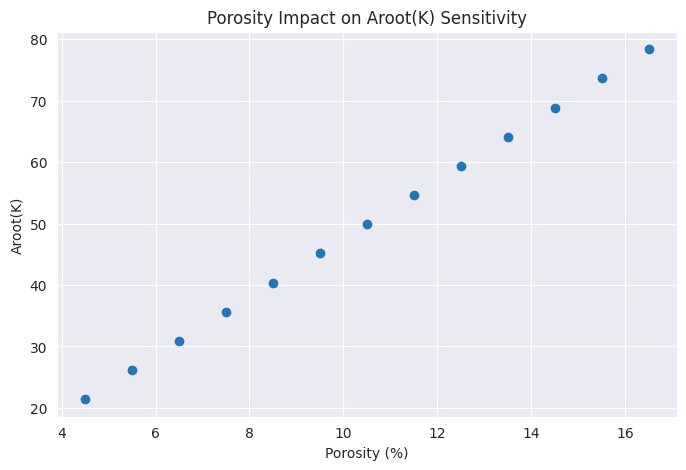

In [72]:
plt.figure(figsize=(8,5))
por=np.linspace(4.5,16.5,13)
plt.scatter(por,y_pred_sensitivity.iloc[0:13])
plt.title('Porosity Impact on Aroot(K) Sensitivity')
plt.xlabel('Porosity (%)')
plt.ylabel('Aroot(K)')

In [73]:
por=np.linspace(4.5,16.5,13)
por

array([ 4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5, 14.5,
       15.5, 16.5])

Text(0, 0.5, 'Aroot(K)')

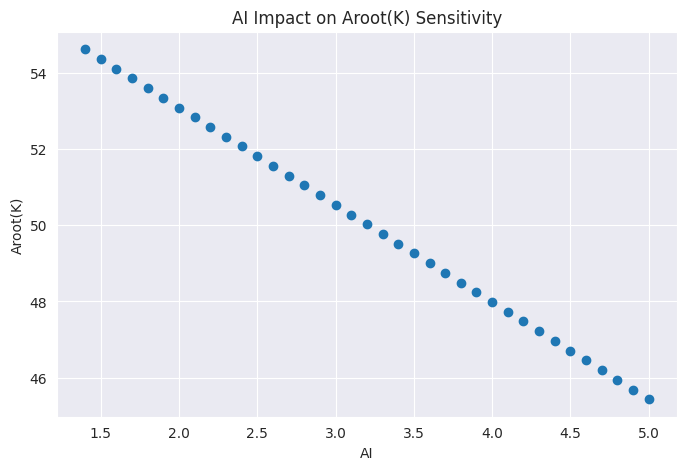

In [74]:
plt.figure(figsize=(8,5))
AI=np.linspace(1.4,5,37)
plt.scatter(AI,y_pred_sensitivity.iloc[13:50])
plt.title('AI Impact on Aroot(K) Sensitivity')
plt.xlabel('AI')
plt.ylabel('Aroot(K)')

Text(0, 0.5, 'Aroot(K)')

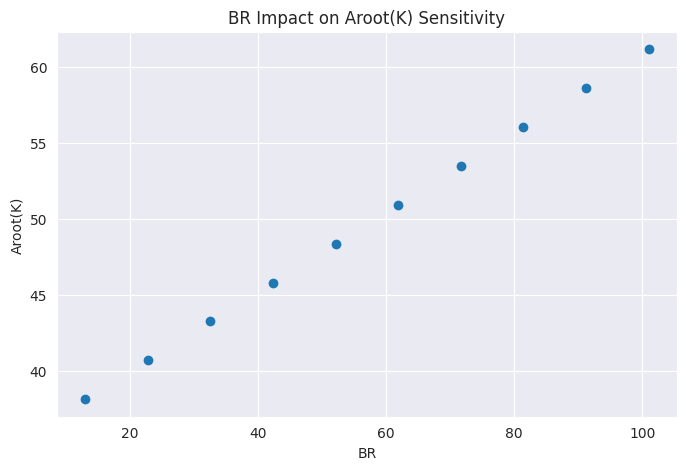

In [75]:
plt.figure(figsize=(8,5))
BR=np.linspace(13,101,10)
plt.scatter(BR,y_pred_sensitivity.iloc[50:60])
plt.title('BR Impact on Aroot(K) Sensitivity')
plt.xlabel('BR')
plt.ylabel('Aroot(K)')

Text(0, 0.5, 'Aroot(K)')

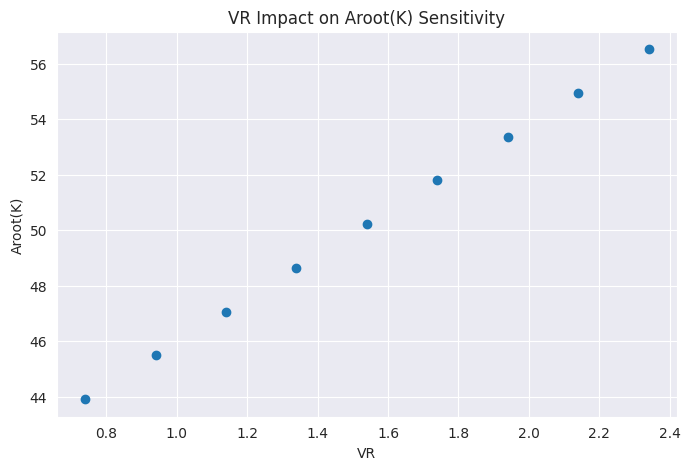

In [76]:
plt.figure(figsize=(8,5))
VR=np.linspace(0.74,2.34,9)
plt.scatter(VR,y_pred_sensitivity.iloc[60:69])
plt.title('VR Impact on Aroot(K) Sensitivity')
plt.xlabel('VR')
plt.ylabel('Aroot(K)')